# Analise de Dados de um serviço bancário
Este serviço bancário nos traz um banco de dados sobre informações acerca dos seus clientes, para tornar possível a analise de:
- Possíveis causas do Churn;
- Entender o perfil das pessoas desligadas;
- Perfil de clientes com tendência a sair.

In [100]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [101]:
#Leitura do dataframe
tabela = pd.read_csv('churn.csv')
display(tabela)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [102]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [103]:
#Excluir colunas não necessárias a análise
colunas_exluidas = ['RowNumber','CustomerId']

tabela_nova = tabela.drop(colunas_exluidas,axis=1)
tabela_nova

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [104]:
#Dividir colunas em qualitativas em quantitativas para melhorar a análise

array_quali = ['Surname','Geography','Gender','HasCrCard','IsActiveMember','Exited']
array_quanti =['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited']

tabela_quali = tabela_nova[array_quali]
tabela_quanti = tabela_nova[array_quanti]

In [105]:
#Analise estatística dos dados quantitativos
tabela_quanti.describe().round()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,651.0,39.0,5.0,76486.0,2.0,1.0,100090.0,0.0
std,97.0,10.0,3.0,62397.0,1.0,0.0,57510.0,0.0
min,350.0,18.0,0.0,0.0,1.0,0.0,12.0,0.0
25%,584.0,32.0,3.0,0.0,1.0,0.0,51002.0,0.0
50%,652.0,37.0,5.0,97199.0,1.0,1.0,100194.0,0.0
75%,718.0,44.0,7.0,127644.0,2.0,1.0,149388.0,0.0
max,850.0,92.0,10.0,250898.0,4.0,1.0,199992.0,1.0


**Analise Gráfica dos clientes desligados**

In [106]:
#Localizar na tabela qualitativa os clientes desligados
tabela_quali_exited = tabela_quali.loc[tabela_quali['Exited'] == 1]

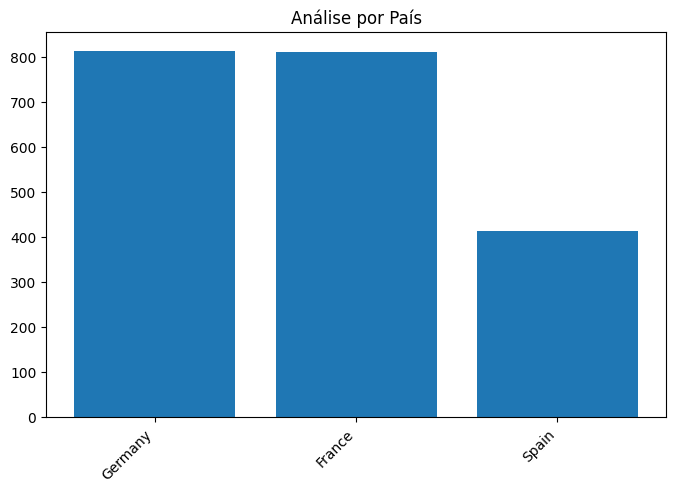

In [107]:
#Analise Gráfica sobre os países

plt.figure(figsize =(8,5))
plt.title("Análise por País")
plt.bar(tabela_quali_exited['Geography'].value_counts().index,tabela_quali_exited['Geography'].value_counts());
plt.xticks(rotation = 45, ha ='right');

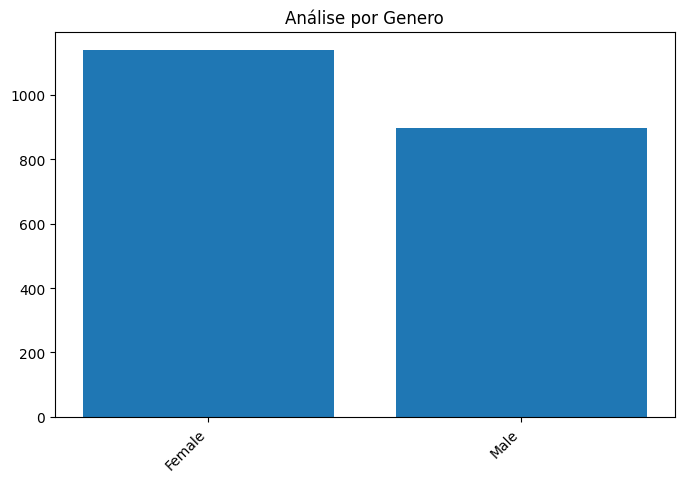

In [108]:
#Análise Gráfica do gênero 
plt.figure(figsize =(8,5))
plt.title("Análise por Genero")
plt.bar(tabela_quali_exited['Gender'].value_counts().index,tabela_quali_exited['Gender'].value_counts());
plt.xticks(rotation = 45, ha ='right');

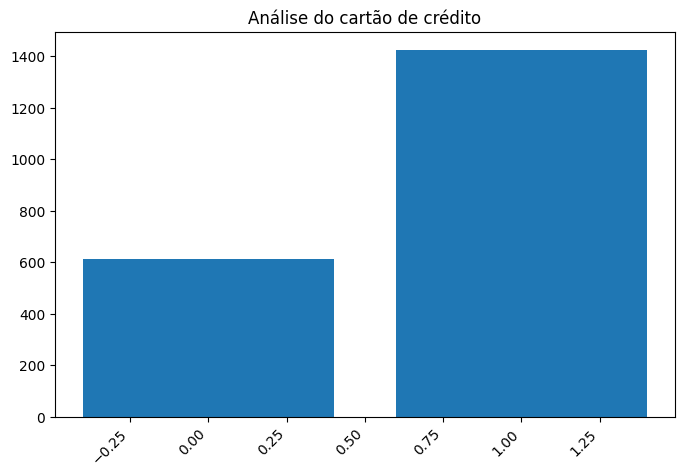

In [173]:
#Análise Gráfica do cartão de crédito
plt.figure(figsize =(8,5))
plt.title("Análise do cartão de crédito")
plt.bar(tabela_quali_exited['HasCrCard'].value_counts().index,tabela_quali_exited['HasCrCard'].value_counts());
plt.xticks(rotation = 45, ha ='right');

Nessas primeiras análises pode-se notar os primeiros traços do perfil dos clientes desligados:
- Alemães;
- Gênero feminino;
- Que possuem cartão.

A informação mais interessante nesses primeiros gráficos é justamente o fato de que possuir cartão do banco não é indicativo de retenção de clientes.

**Análise da tabela quantitativa**

In [109]:
#Localizar na tabela quantitativa dos clientes desligados
tabela_quanti_exited = tabela_quanti.loc[tabela_quanti['Exited'] == 1]
tabela_quanti_stayed = tabela_quanti.loc[tabela_quanti['Exited'] == 0]

In [110]:
dados_produtos_exited = tabela_quanti_exited['NumOfProducts'].value_counts()
dados_produtos_exited

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

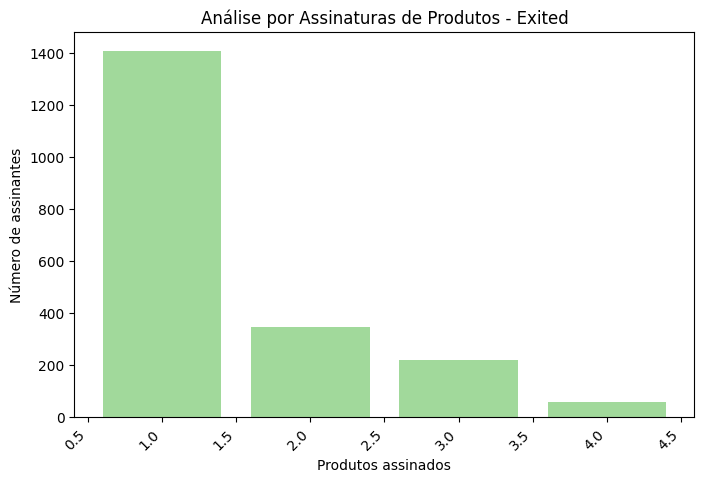

In [111]:
plt.figure(figsize =(8,5))
plt.title("Análise por Assinaturas de Produtos - Exited")
plt.bar(dados_produtos_exited.index,dados_produtos_exited, color = '#a1d99b');
plt.xlabel('Produtos assinados')
plt.ylabel('Número de assinantes')
plt.xticks(rotation = 45, ha ='right');

In [112]:
#Analisar a quantidade de produtos das pessoas que ainda são clientes
dados_produtos = tabela_quanti_stayed['NumOfProducts'].value_counts()
dados_produtos

2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64

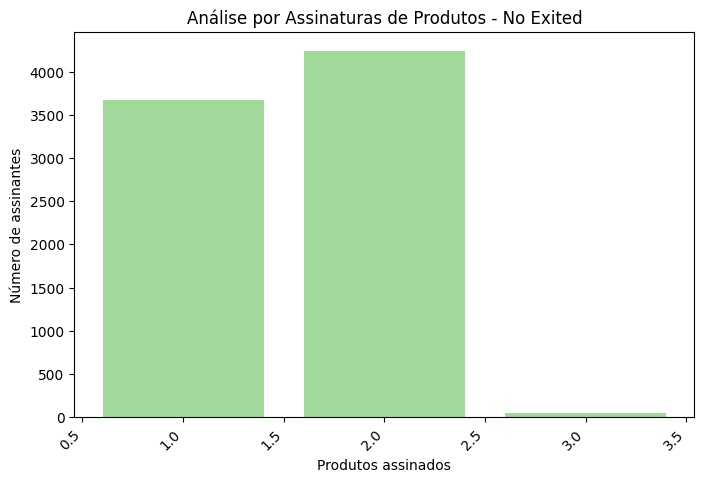

In [113]:
plt.figure(figsize =(8,5))
plt.title("Análise por Assinaturas de Produtos - No Exited")
plt.bar(dados_produtos.index,dados_produtos, color = '#a1d99b');
plt.xlabel('Produtos assinados')
plt.ylabel('Número de assinantes')
plt.xticks(rotation = 45, ha ='right');

Nota-se que tanto as pessoas que saíram, como as que ainda são clientes tem um indice em comum: 1 Produto assinado.
Seria possível uma análise mais aprofundada para entender as datas de contrato que essas pessoas que ainda são clientes mas possuem apenas um produto. Uma hipótese seria ter apenas um produto assinado por ser cliente recente.

In [114]:
#Ver pessoas com estimativa de salario baixo, balanço alto e se é membro ativo

salario_baixo = tabela_nova.loc[tabela_quanti['EstimatedSalary'] < 500]
salario_baixo.sort_values(['Balance'],ascending=False)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5120,Brown,663,France,Male,26,5,141462.13,1,1,0,440.20,0
8671,Shih,542,Germany,Female,35,9,127543.11,2,1,0,468.94,1
7224,Chieloka,751,Spain,Female,34,8,127095.14,2,0,0,479.54,0
2362,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9010,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
2046,Chou,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0
7226,Cocci,777,Germany,Female,46,0,107362.80,1,1,0,487.30,0
7565,Clifton,708,France,Male,52,10,105355.81,1,1,0,123.07,1
5675,Binder,766,France,Female,26,3,104258.80,1,1,1,428.23,0
1462,Hsu,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1


In [115]:
#Criando uma coluna quali sobre salario

def faixa_salarial(salario):
    if salario <= 500: return 'baixo'
    if salario > 500 and salario <= 50000: return 'medio'
    return 'alto'

tabela_quanti['Faixa salarial'] = [faixa_salarial(salario) for salario in tabela_quanti.EstimatedSalary.to_list()]  
tabela_quanti  

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Faixa salarial
0,619,42,2,0.00,1,1,101348.88,1,alto
1,608,41,1,83807.86,1,1,112542.58,0,alto
2,502,42,8,159660.80,3,0,113931.57,1,alto
3,699,39,1,0.00,2,0,93826.63,0,alto
4,850,43,2,125510.82,1,1,79084.10,0,alto
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,0,96270.64,0,alto
9996,516,35,10,57369.61,1,1,101699.77,0,alto
9997,709,36,7,0.00,1,1,42085.58,1,medio
9998,772,42,3,75075.31,2,0,92888.52,1,alto


**Tabela Desligados**

In [116]:
#Adicionando a coluna 'faixa salarial' na tabela dos desligados
tabela_quanti_exited['Faixa salarial'] = [faixa_salarial(salario) for salario in tabela_quanti_exited.EstimatedSalary.to_list()]  
tabela_quanti_exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Faixa salarial
0,619,42,2,0.00,1,1,101348.88,1,alto
2,502,42,8,159660.80,3,0,113931.57,1,alto
5,645,44,8,113755.78,2,0,149756.71,1,alto
7,376,29,4,115046.74,4,0,119346.88,1,alto
16,653,58,1,132602.88,1,0,5097.67,1,medio
...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,53445.17,1,alto
9982,655,46,7,137145.12,1,0,115146.40,1,alto
9991,597,53,4,88381.21,1,0,69384.71,1,alto
9997,709,36,7,0.00,1,1,42085.58,1,medio


In [117]:
#Analise das pessoas desligadas por faixa salarial
analise_salario = tabela_quanti_exited['Faixa salarial'].value_counts()
analise_salario


alto     1548
medio     483
baixo       6
Name: Faixa salarial, dtype: int64

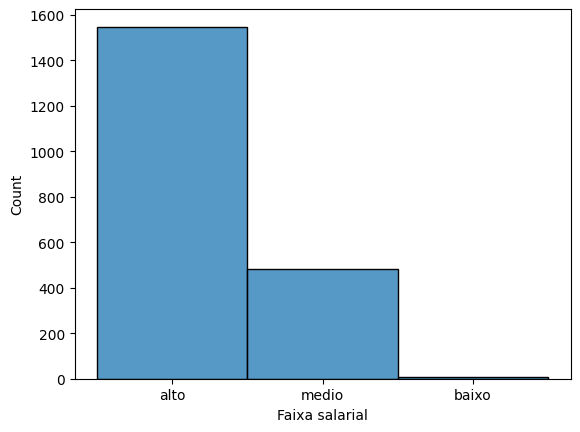

In [118]:
sns.histplot(data=tabela_quanti_exited, x='Faixa salarial');

In [131]:
#Porcentagem de membros ativos e inativos com faixa salarial alta
membros_ativos = tabela_quanti_exited.loc[tabela_quanti_exited['Faixa salarial']=='alto']
porcentagem_membros_ativos = membros_ativos['IsActiveMember'].value_counts(normalize=True)
porcentagem_membros_ativos

0    0.642765
1    0.357235
Name: IsActiveMember, dtype: float64

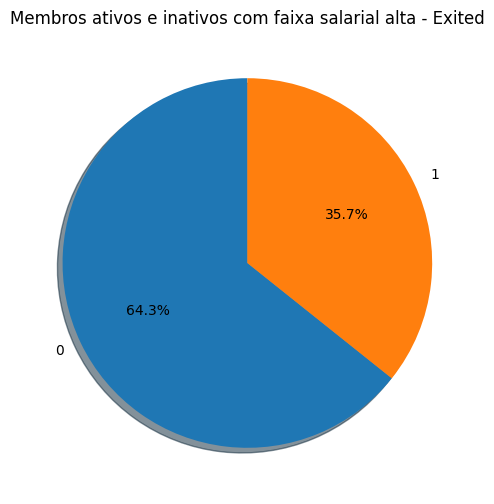

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,6))
plt.title("Membros ativos e inativos com faixa salarial alta - Exited")
plt.pie(porcentagem_membros_ativos, labels = porcentagem_membros_ativos.index,shadow = True, startangle=90, autopct='%1.1f%%')
plt.show()

Com a análise gráfica sobre a faixa salarial, nota-se que pessoas com salário alto são a grande maioria no perfil de pessoas que se desligaram do banco. Essa informação nos leva a pensar o porque pessoas com esse perfil estão se desligando, porém, fazendo uma análise desse público e mesclando com a coluna de 'IsActiveMember'(que mostra os membros ativos e inativos do banco), temos um percentual de 64% desse público é inativo, ou seja, faz poucas transações ou utiliza muito pouco os serviços bancários.

**Tabela dos clientes**

In [124]:
tabela_quanti_stayed['Faixa salarial'] = [faixa_salarial(salario) for salario in tabela_quanti_stayed.EstimatedSalary.to_list()]  
tabela_quanti_stayed

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Faixa salarial
1,608,41,1,83807.86,1,1,112542.58,0,alto
3,699,39,1,0.00,2,0,93826.63,0,alto
4,850,43,2,125510.82,1,1,79084.10,0,alto
6,822,50,7,0.00,2,1,10062.80,0,medio
8,501,44,4,142051.07,2,1,74940.50,0,alto
...,...,...,...,...,...,...,...,...,...
9993,644,28,7,155060.41,1,0,29179.52,0,medio
9994,800,29,2,0.00,2,0,167773.55,0,alto
9995,771,39,5,0.00,2,0,96270.64,0,alto
9996,516,35,10,57369.61,1,1,101699.77,0,alto


In [127]:
#Analise de quantidade de pessoas com salario alto mas ainda são clientes
analise_salario_stayed = tabela_quanti_stayed['Faixa salarial'].value_counts()
analise_salario_stayed

alto     5999
medio    1947
baixo      17
Name: Faixa salarial, dtype: int64

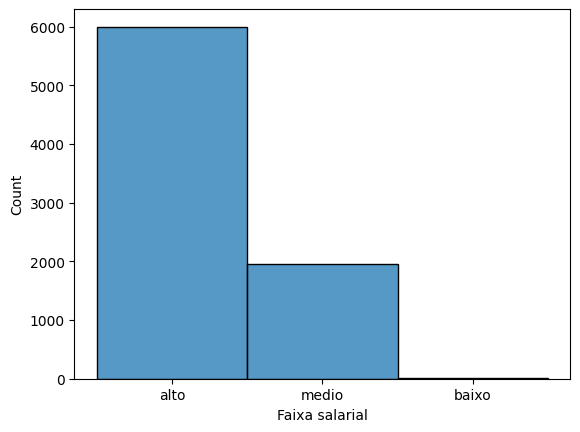

In [134]:
sns.histplot(data=tabela_quanti_stayed, x='Faixa salarial');

In [162]:
#Porcentagem de pessoas que são clientes e membros ativos e tem faixa salarial alta
membros_ativos_clientes = tabela_quanti_stayed.loc[tabela_quanti_stayed['Faixa salarial']=='alto']
porcentagem_clientes_ativos = membros_ativos_clientes['IsActiveMember'].value_counts(normalize=True)
porcentagem_clientes_ativos

1    0.554426
0    0.445574
Name: IsActiveMember, dtype: float64

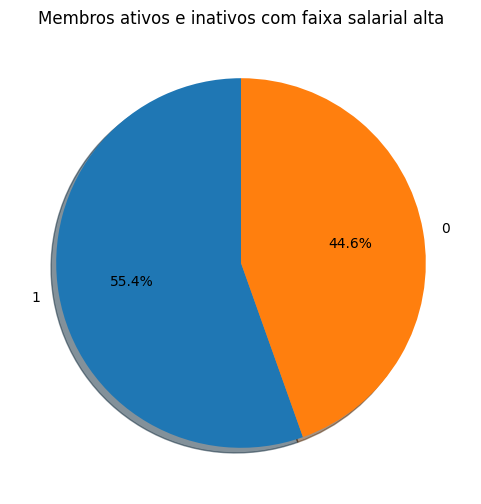

In [151]:
plt.figure(figsize =(15,6))
plt.title("Membros ativos e inativos com faixa salarial alta")
plt.pie(porcentagem_clientes_ativos, labels = porcentagem_clientes_ativos.index,shadow = True, startangle=90, autopct='%1.1f%%')
plt.show()

Quando essa análise passa a ser apenas na tabela daqueles que ainda são clientes, nota-se que a maioria é justamente membros que são ativos no banco, porém, a diferença é bem pouca. Sendo esses 44,6% a segmentação de possíveis churn no futuro, cabendo uma análise melhor pra entender esse perfil e traçar estragégias.

ver pessoas com estimativa de salario baixo e se são membros ativos

In [130]:
salario_baixo = tabela_quanti.loc[tabela_quanti['Faixa salarial'] == 'baixo']
salario_baixo['IsActiveMember'].value_counts()

1    12
0    11
Name: IsActiveMember, dtype: int64

**ANÁLISE DO PERFIL DE POSSÍVEIS CHURN FUTUROS**

Analisar pessoas que ainda são clientes, mas tem tendencia a sair e mesclar com perfil dos churn

In [165]:
clientes = tabela_nova.loc[tabela_nova['Exited'] == 0]

In [164]:
clientes['IsActiveMember'].value_counts(normalize=True)

1    0.554565
0    0.445435
Name: IsActiveMember, dtype: float64

In [166]:
clientes_inativos = clientes.loc[clientes['IsActiveMember'] == 0]
clientes_inativos

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
10,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


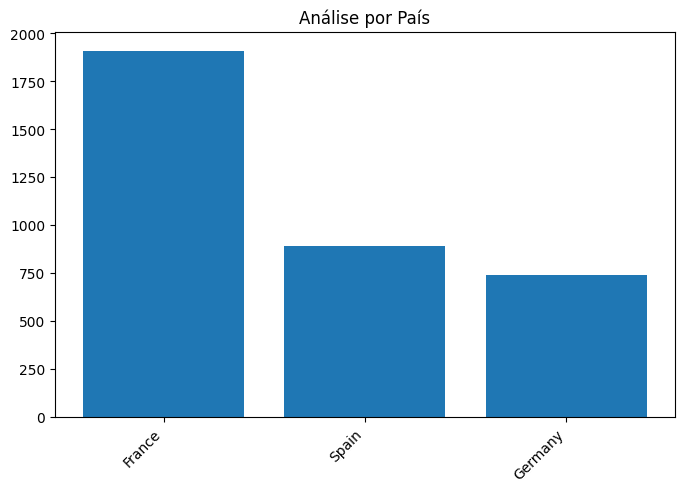

In [167]:
plt.figure(figsize =(8,5))
plt.title("Análise por País")
plt.bar(clientes_inativos['Geography'].value_counts().index,clientes_inativos['Geography'].value_counts());
plt.xticks(rotation = 45, ha ='right');

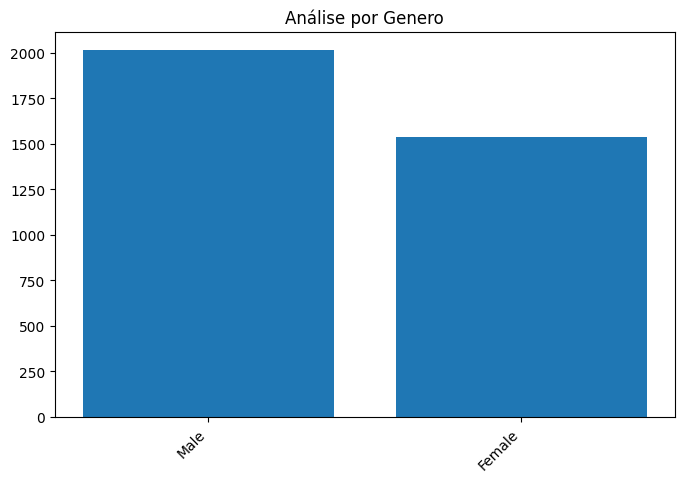

In [168]:
#Análise Gráfica do gênero 
plt.figure(figsize =(8,5))
plt.title("Análise por Genero")
plt.bar(clientes_inativos['Gender'].value_counts().index,clientes_inativos['Gender'].value_counts());
plt.xticks(rotation = 45, ha ='right');

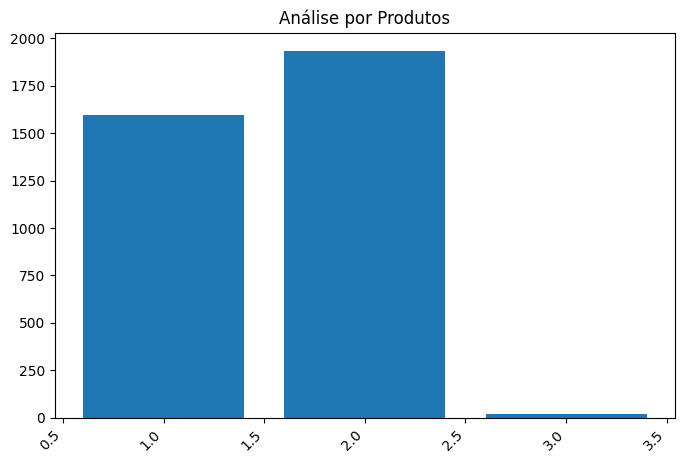

In [169]:
#Análise Gráfica de Produtos 
plt.figure(figsize =(8,5))
plt.title("Análise por Produtos")
plt.bar(clientes_inativos['NumOfProducts'].value_counts().index,clientes_inativos['NumOfProducts'].value_counts());
plt.xticks(rotation = 45, ha ='right');

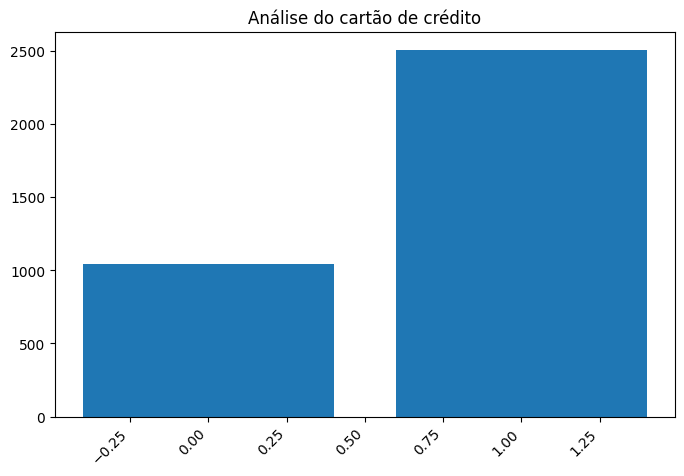

In [170]:
#Análise Gráfica do cartão de crédito
plt.figure(figsize =(8,5))
plt.title("Análise do cartão de crédito")
plt.bar(clientes_inativos['HasCrCard'].value_counts().index,clientes_inativos['HasCrCard'].value_counts());
plt.xticks(rotation = 45, ha ='right');

Resumindo os primeiros gráficos do perfil de clientes que podem se desligar do banco:
- São da França;
- Gênero Masculino;
- A sua maioria assina dois produtos ou serviços;
- A maioria possui cartão de crédito.

Mais uma vez voltamos a tese de que cartão de crédito não é indicativo de retenção do cliente e o número de produtos e serviços assinados também não. Disso pode surgir três perguntas: Quais os problemas os cartões de créditos podem estar causando ao cliente? Por que o número de produtos assinados pelos desligados e pelos clientes são bem parecidos? 